In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import pandas as pd
%matplotlib inline
import sys

#Make sure Python Analysis folder in in PYTHONPATH and import the mhdpy module
#PythonAnalysisPath = 'C:\\Users\\aspit\\Git\\MHDLab\\Analysis\\Python Analysis'
#if not PythonAnalysisPath in sys.path:
#    sys.path.append(PythonAnalysisPath)
#print(sys.path)
import mhdpy.importing as importing
import mhdpy.plotting as plotting
import mhdpy.analysis as analysis
import mhdpy.SPEparse as SPEparse
from nptdms import TdmsFile as TF

import importlib

mpl.rcParams.update({'font.size': 18})

In [113]:
folder = "C:\\Users\\aspit\\OneDrive\\Data\\2018-10-05\\Proj_VaporTubes\\Rep Rate 500Aq"

PI_Cam1_10Hz= SPEparse.SPE2df_spect(os.path.join(folder, "PI_Cam1_10Hz.spe"))
PI_Cam1_20Hz= SPEparse.SPE2df_spect(os.path.join(folder, "PI_Cam1_20Hz.spe"))
PI_Cam1_50Hz= SPEparse.SPE2df_spect(os.path.join(folder, "PI_Cam1_50Hz.spe"))
PI_Cam1_100Hz= SPEparse.SPE2df_spect(os.path.join(folder, "PI_Cam1_100Hz.spe"))
PI_Cam1_200Hz= SPEparse.SPE2df_spect(os.path.join(folder, "PI_Cam1_200Hz.spe"))

files = [PI_Cam1_10Hz,PI_Cam1_20Hz,PI_Cam1_50Hz,PI_Cam1_100Hz,PI_Cam1_200Hz]

files_cut = []
for file in files:
    files_cut.append(SPEparse.cutspectraldf(file, 778,781))
    
files_cut = pd.Series(files_cut,index = ['10Hz','20Hz','50Hz','100Hz','200Hz'])
reprates = [10,20,50,100,200]

maximums = []
for file in files_cut:
    maximums.append(file.max()[0])

Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object


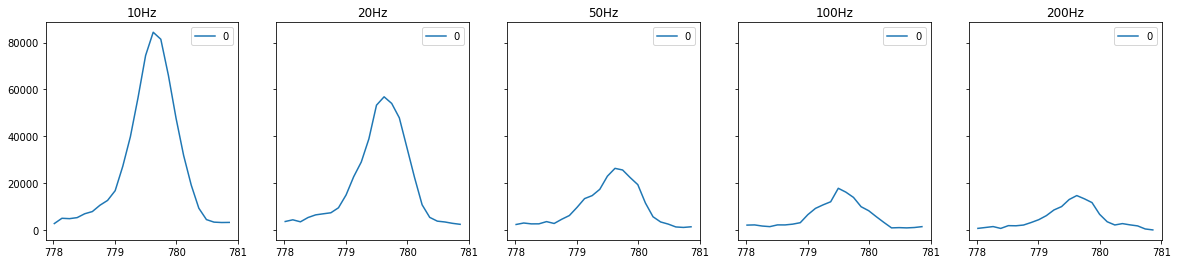

In [114]:
fig, ax = plt.subplots(1,5,sharey = True, figsize = (20,4))

for idx in range(len(files_cut)):
    
    ax[idx].plot(files_cut[idx].index,files_cut[idx])
    ax[idx].set_title(str(files_cut.index[idx]))
    ax[idx].legend(files_cut[idx].columns)


    #Fullrangeplot = SPEparse.SpectraPlot(PI_Cam1_60C_10Hz_cut, PI_Cam1_60C_10Hz_cut.index)

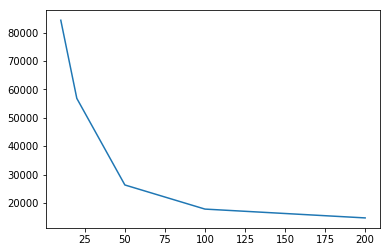

In [115]:
plt.plot(reprates,maximums)

In [127]:
folder = "C:\\Users\\aspit\\OneDrive\\Data\\2018-10-05\\Proj_VaporTubes\\TempandReprate 2"

PI_Cam1_60C_10Hz= SPEparse.SPE2df_spect(os.path.join(folder, "PI_Cam1_60C_10Hz.spe"))
PI_Cam1_60C_20Hz_3= SPEparse.SPE2df_spect(os.path.join(folder, "PI_Cam1_60C_20Hz_3.spe"))
PI_Cam1_60C_50Hz= SPEparse.SPE2df_spect(os.path.join(folder, "PI_Cam1_60C_50Hz.spe"))
PI_Cam1_60C_100Hz= SPEparse.SPE2df_spect(os.path.join(folder, "PI_Cam1_60C_100Hz.spe"))
PI_Cam1_60C_200Hz_3= SPEparse.SPE2df_spect(os.path.join(folder, "PI_Cam1_60C_200Hz_3.spe"))

files = [PI_Cam1_60C_10Hz,PI_Cam1_60C_20Hz_3,PI_Cam1_60C_50Hz,PI_Cam1_60C_100Hz,PI_Cam1_60C_200Hz_3]

files_cut = []
for file in files:
    files_cut.append(SPEparse.cutspectraldf(file, 778,781))
    
files_cut = pd.Series(files_cut,index = ['10Hz','20Hz','50Hz','100Hz','200Hz'])

maximums = []

for file in files_cut:
    maxtemp = []
    for idx in file.columns:
        maxtemp.append(file[idx].max())

    maximums.append(maxtemp)

maximums

Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object


[[12733.0, 18583.0, 15785.0, 13714.0, 16035.0],
 [10623.0, 18954.0, 13862.0, 14533.0, 8732.0],
 [15361.0, 14976.0, 15080.0, 10875.0, 11729.0],
 [12885.0, 11459.0, 12324.0, 13261.0, 9490.0],
 [17532.0, 10837.0, 14880.0, 10880.0, 8270.0]]

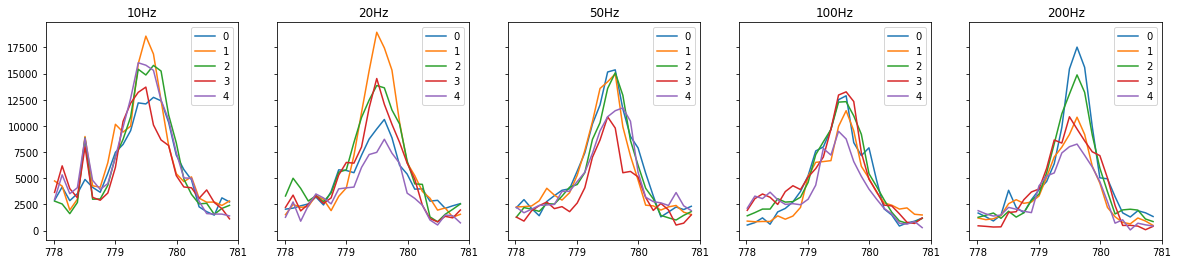

In [117]:
fig, ax = plt.subplots(1,5,sharey = True, figsize = (20,4))

for idx in range(len(files_cut)):
    
    ax[idx].plot(files_cut[idx].index,files_cut[idx])
    ax[idx].set_title(str(files_cut.index[idx]))
    ax[idx].legend(files_cut[idx].columns)


    #Fullrangeplot = SPEparse.SpectraPlot(PI_Cam1_60C_10Hz_cut, PI_Cam1_60C_10Hz_cut.index)

Text(0.5,0,'frame #')

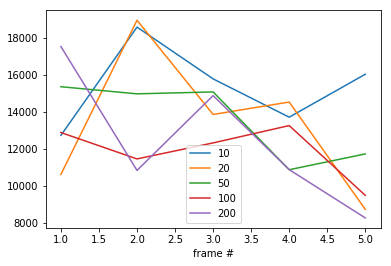

In [135]:
for maxarray in maximums:
    plt.plot([1,2,3,4,5],maxarray)
plt.legend(reprates)
plt.xlabel('frame #')